# Come up with function to expand zones

In [1]:
triangle1 = [[0,0],[0,1],[1,0]]
triangle2 = [[0,0],[1,1],[1,0]]


In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import math

kmeans = KMeans(n_clusters=1)
kmeans = kmeans.fit(triangle2)
centroid = kmeans.cluster_centers_

centroid[0][1]

def polar(x, y):
    """returns r, theta(degrees)
    """
    r = (x ** 2 + y ** 2) ** .5
    if y == 0:
        theta = 180 if x < 0 else 0
    elif x == 0:
        theta = 90 if y > 0 else 270
    else:
        theta = math.degrees(math.atan(float(y) / x)) 
    return r, theta

In [37]:
for x in triangle2:
    print(x,'pair(xy)')
    new_x = centroid[0][0]-x[0]
    new_y = centroid[0][1]-x[1]
    
    print(new_x, new_y, 'new(x,y)')
    
    r, theta = polar(new_x,new_y)
    
    print('r =',r)
    
    if new_y < 0:
        if new_x >0:
            theta += 180
        else:
            theta += 0
    else:
        if new_x < 0:
            theta += 360
        else:
            theta += 180
            
    c = r + 1
    a = c * math.sin(theta)
    b = math.sqrt((c**2)-(a**2))
    
    print('a (new y) = ',a,'\n')
    print('b (new x) = ',b,'\n')
    print('c = ',c,'\n')
    print('theta = ',theta, '\n')
    print('\n')

[0, 0] pair(xy)
0.6666666666666666 0.33333333333333337 new(x,y)
r = 0.7453559924999299
a (new y) =  -1.227552307393523 

b (new x) =  1.240718692197491 

c =  1.7453559924999298 

theta =  206.565051177078 



[1, 1] pair(xy)
-0.33333333333333337 -0.6666666666666666 new(x,y)
r = 0.7453559924999299
a (new y) =  0.989956838383058 

b (new x) =  1.437446694209575 

c =  1.7453559924999298 

theta =  63.43494882292201 



[1, 0] pair(xy)
-0.33333333333333337 0.33333333333333337 new(x,y)
r = 0.47140452079103173
a (new y) =  1.0963924540615568 

b (new x) =  0.9813026294070362 

c =  1.4714045207910318 

theta =  315.0 





# Using Clipper to expand

In [49]:
import pyclipper

subj = ((0,0),(1,0),(1,1))

pco = pyclipper.Pyclipper()
pco.AddPath(subj, )

solution = pco.Execute(5.0)

print(solution)

[[[6, -2], [6, 4], [0, 7], [-6, 1], [-3, -5], [3, -5]]]


# Using shapely to expand

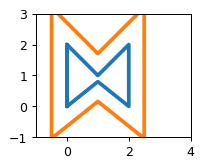

In [147]:
from matplotlib import pyplot
from shapely.geometry import LinearRing, LineString
from descartes import PolygonPatch

def plot_coords(ax, x, y, color='#999999', zorder=1):
    ax.plot(x, y, 'o', color=color, zorder=zorder)

def plot_line(ax, ob,):
    parts = hasattr(ob, 'geoms') and ob or [ob]
    for part in parts:
        x, y = part.xy
        ax.plot(x, y, linewidth=3, solid_capstyle='round', zorder=1)

def set_limits(ax, x_range, y_range):
    ax.set_xlim(*x_range)
    ax.set_ylim(*y_range)
    ax.set_aspect(1)


ax = fig.add_subplot(121)
ring1 = LinearRing([(0, 0), (0, 2), (1, 1), (2, 2), (2, 0), (1, 0.8), (0, 0),(0,2)])
fig = pyplot.figure(1, dpi=90)

ax = fig.add_subplot(222)

plot_line(ax, ring1)

offset = ring1.parallel_offset(0.5, 'left', join_style=2, mitre_limit=10.0)
plot_line(ax, offset)
set_limits(ax, ax_range, ay_range)
#offset.coords